<a href="https://colab.research.google.com/github/Shankar034/PyTorch/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PyTorch Workflow

* Collect Data (prepare and load data)
* Build Model
* fitting the model to the data(training)
* Making prediction and evaluating the model
* Saving and loading model
* Putting it all together


In [30]:
import torch
from torch import nn # nn for neural network
import matplotlib.pyplot as plt
torch.__version__

'2.0.1+cu118'


### 1. Data (Prepare and Load data)
data can be anything
* Excel Sheet
* Images
* Audio or Video
* DNA
* Text

# Machine learninig is the game of two parts:
1. get data into numerical representations
2. Building the model to learn the pattern from numerical data

In [31]:
# Known datasets
import torch
weight = 0.7
bias = 0.3
start =0
end = 1
steps=0.02
X = torch.arange(start, end, steps).unsqueeze(dim=1)
y= weight* X + bias
X[:10] ,y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [32]:
len(X), len(y)

(50, 50)

In [33]:
#Creating Training and test split
split = int(len(X)*0.8)
X_training= X[:split]
y_training= y[:split]
X_test = X[split:]
y_test=y[split:]
len(X_training), len(y_training), len(X_test), len(y_test)

(40, 40, 10, 10)

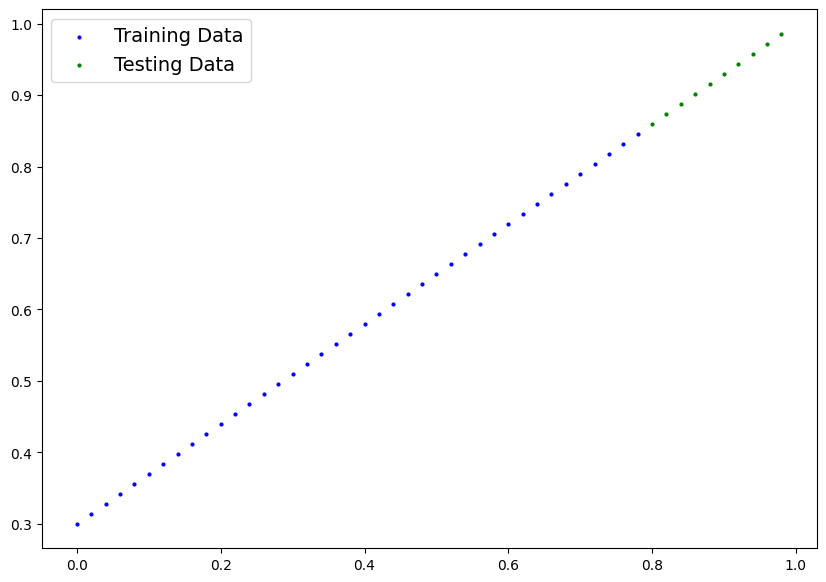

In [34]:
def plot_predictions(train_data= X_training,
                     train_level=y_training,
                     test_data=X_test,
                     test_level=y_test,
                     predictions = None):
  """
  This is the training, test and predictions
  """
  plt.figure(figsize=(10,7))
  #plot training data into Blue
  plt.scatter(train_data,train_level,c="b",s=4, label = "Training Data")
  #plot test data into Blue
  plt.scatter( test_data,test_level, c="g", s=4, label = "Testing Data" )
  #Are there predictions?
  if predictions is not None:
    # Plot the predictions if there is
    plt.scatter(test_data, predictions, c="r", s=4, label = "Predictions")
  #show the legend
  plt.legend(prop={"size":14})
plot_predictions()



###2. Building Pytorch Model
Two main algorithms:
* Gradiant Descent
* Backpropagation


In [35]:
import torch
from torch import nn

#Creating linear regression model
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                          requires_grad= True,
                          dtype=torch.float))
    self.bias= nn.Parameter(torch.randn(1,
                      requires_grad = True,
                      dtype=torch.float))

# Model for the computation
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights *x + self.bias


#Pytorch Model Building Methods
* torch.nn : used for the generation computational graphs
* torch.nn.Parameter : trained and learned parameter
* torch.nn.Module: It is the main model for neural next
* torch.optim: It is used for optimization
* def forward() : Used to calculate forward parameters
* torch.utils.data.Dataset : Map between label and features
* torch.utils.data.Dataloader: help to iterate with your own dataset


### Checking out the internals
1.  get data ready
    * torchvision.transforms
    * torch.utils.data.Dataset
    * torch.utils.data.DataLoader
2.  Build or pick the pretrained model
    * torchvision.models
    * torch.nn
    * torch.nn.Module
  2.1 Pick a lossfunction and optimizer
    * torch.optim #Inside optimizer two things are places params and lr.
    params takes model_0.parameters() and lr is the rate how large or small the optimizer change the parameter with each step.
3.  Fit the model to the data and make predictions
4.  Evaluate the model
    * torchmatrix
5.  improve through experimentation
    * torch.utils.tensorboard
6.  Save and reload your pretrained model

#Checking the content of pytorch model


In [36]:
#Creating seed
torch.manual_seed(42)

#creating instance of regression model
model_0 = LinearRegressionModel()

#representing the model

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [37]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [38]:
weight, bias

(0.7, 0.3)

# Prediction using torch.inference_mode()

In [39]:
y_preds = model_0(X_test)
y_preds

# Make prediction with model
# You can do similiar with no_grad but inference_mode is preferred .
with torch.inference_mode():
  y_preds=model_0(X_test)
y_preds

with torch.no_grad():
  y_preds=model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [40]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

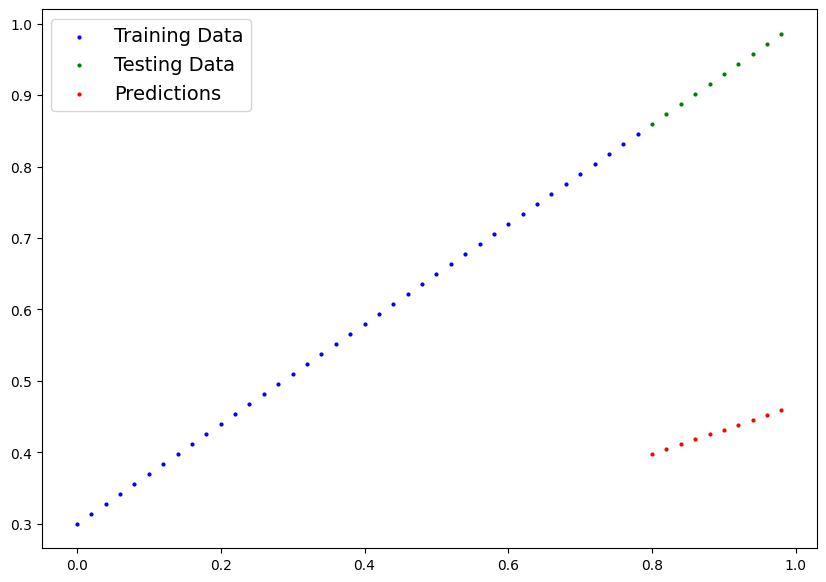

In [41]:
plot_predictions(predictions = y_preds)

### Train Model

It is all about making wrong pridiction towards right prediction or prediction the data from unpredicted data.
Making the weak or poor representation towards strong representation
For this loss function and optimizer is used:
* **Loss Function**: It is used to represent how poor or wrong the representation is. Lower the loss function better the prediction.
* **Optimizer** : It is used to reduce the loss by optimizing the parameters of the model

In pytorch we need:
* Training Loop
* Testing Loop



In [42]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [43]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [44]:

#loss function setup
loss_fn = nn.L1Loss()
#Optimizing function setup
optimizer = torch.optim.SGD(params = model_0.parameters(), lr=0.01)

* For the regression problem use nn.L1Loss and torch.optim.SGD()
* For the clssification problem use nn.BCELoss()


##Building Training and Testing Loop in Pythorch
Couple of things we need in the training loop

1.  Loop through the data
2.  Forward Propagation(Loop the data thorugh the model and make predictions)
3.  Loss calculation
4.  Optimize zero grad
5.  Loss Backward: Backward Propagation
6.  Optimizer step : Use the model and optimize the the parameters to try and improve the loss() **Gradiant Descent**

In [51]:
epochs =1
for epoch in range(epochs):
  # Set the model in training mode
  model_0.train()

  #1. Forward pass
  y_pred = model_0(X_training)
  #2. loss Calculation
  loss = loss_fn(y_pred, y_training)
  print(f"Loss: {loss}")
  #3. Optimize zero grad
  optimizer.zero_grad()
  #4. Back Propagation
  loss.backward()
  #5.  step the Optimizer (gradiant descent)
  optimizer.step()
  #Turn off gradiant tracking
  model_0.eval()
  print(f" Printing model state dict : {model_0.state_dict()}")

Loss: 0.3013603389263153
 Printing model state dict : OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])


In [46]:
weight, bias

(0.7, 0.3)

In [61]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)
y_preds_new

tensor([[0.4244],
        [0.4313],
        [0.4382],
        [0.4451],
        [0.4520],
        [0.4589],
        [0.4657],
        [0.4726],
        [0.4795],
        [0.4864]])

In [53]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])

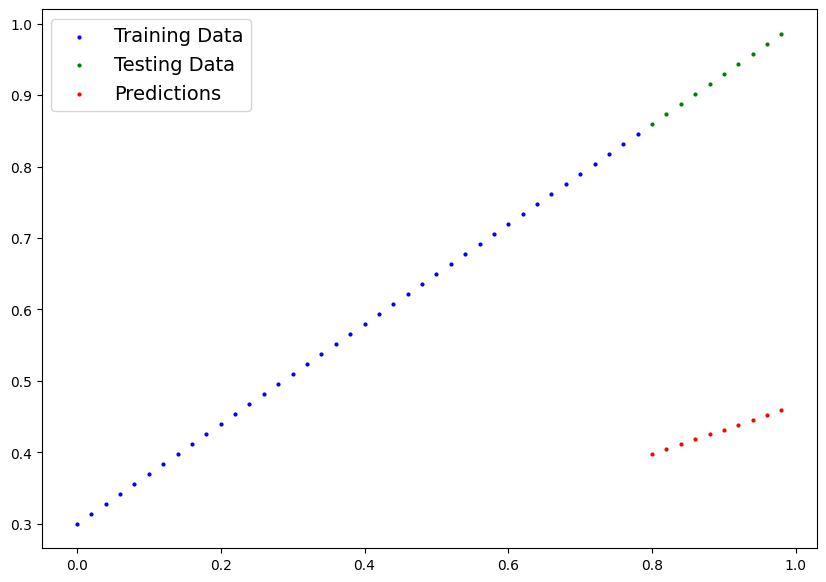

In [54]:
plot_predictions(predictions=y_preds)

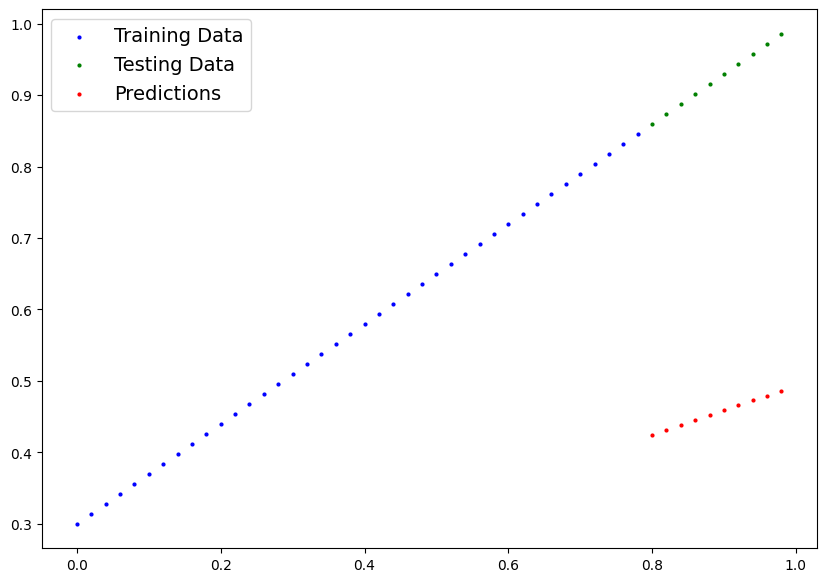

In [62]:
plot_predictions(predictions=y_preds_new)